<a href="https://colab.research.google.com/github/praseedm/Spaceship_titanic/blob/main/E2E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/praseedm/Spaceship_titanic.git

Cloning into 'Spaceship_titanic'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), 357.11 KiB | 3.43 MiB/s, done.


In [2]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np


In [3]:
DATA_DIR = os.path.join('/content/Spaceship_titanic/data')

In [4]:
train_df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))

In [5]:
train_df.shape

(8693, 14)

In [6]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


## Data cleaning and preprocessing

Identify feature types : categorical, ordinal, numberical, boolean, ...

Remove nun,blank or empty values

In [7]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [8]:
train_df["CryoSleep"].unique()

array([False, True, nan], dtype=object)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
#Categorical features

for col in train_df.select_dtypes(include=['object']).columns:
  print(col)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [11]:
#Numerical features

for col in train_df._get_numeric_data().columns:
  print(col)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [12]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
train_df.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


## Plots

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

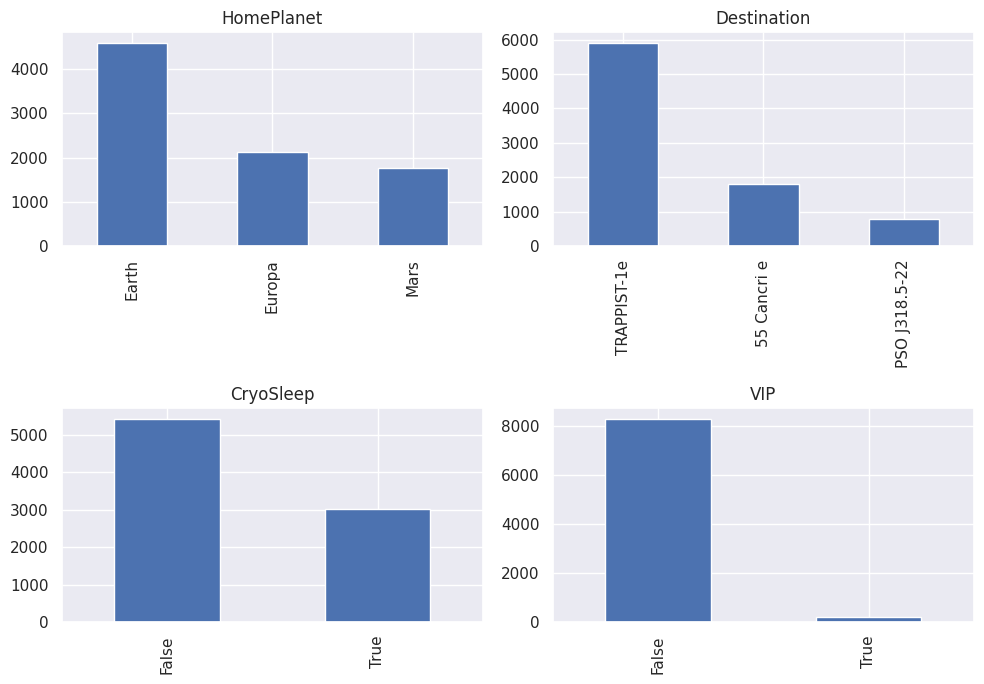

In [15]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
train_df['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
train_df['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
train_df['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
train_df['VIP'].value_counts().plot(kind='bar',title='VIP')
# plt.subplot(2,2,5)
# train_df['Cabin'].value_counts().plot(kind='bar',title='Cabin')
plt.tight_layout();

In [16]:
num_variables = list(train_df._get_numeric_data().columns)
# print(num_variables)
num_variables.remove('Transported')
print(num_variables)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


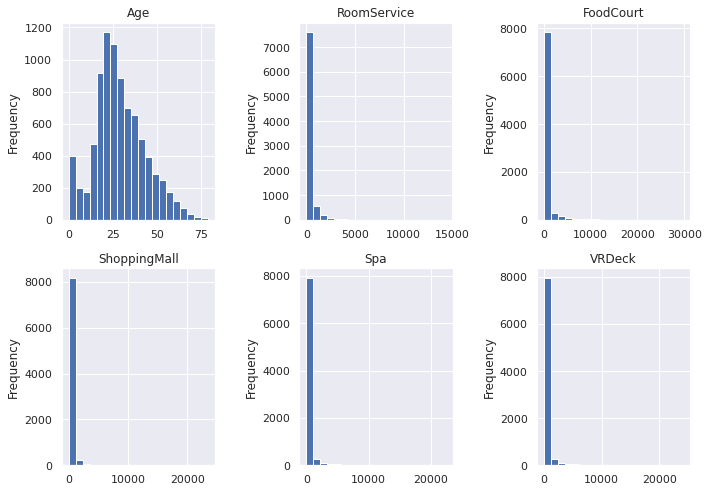

In [ ]:
plt.figure(figsize=(10,7))
for i,num_col in enumerate(num_variables):
    plt.subplot(2,3,i+1)
    train_df[num_col].plot(kind='hist', bins=20)
    plt.title(num_col)
plt.tight_layout();

## Profiling using pandas Profiling

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.6 MB 19.3 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 7.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=344995 sha256=3e23d26ebc45258da785ec2b67311a8469012fb1174ac5150cbe82e0dc77a357
  Stored in directory: /tmp/pip-ephem-wheel-cache-9tx6jfes/wheels/43/c8/f4/c0ebc32d7f20fe89d0e92d90eaeef5f0c0594a89b6bc16b352
Successfully built ydata-profiling
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninsta

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(train_df, title="Spaceship Titanic")

In [ ]:
profile.to_file(output_file="Profiler_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Cleaning and preprocessing

In [17]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [18]:
age_mean = train_df['Age'].mean()
print(age_mean)

28.82793046746535


In [19]:
def cleaning_and_preprocessing(df: pd.DataFrame, age_mean:float ):
  # Filling nan for categorical columns with `missing` string
  df["HomePlanet"].fillna("missing", inplace=True)
  df["CryoSleep"].fillna("missing", inplace=True)
  df["Cabin"].fillna("missing/missing/missing", inplace=True)
  df["Destination"].fillna("missing", inplace=True)
  df["VIP"].fillna("missing", inplace=True)

  # splitting cabin into deck and side features
  df["Deck"] = df["Cabin"].apply(lambda val : val.split('/')[0])
  df["Side"] = df["Cabin"].apply(lambda val : val.split('/')[2])
  # Cabin column is dropped.
  df.drop(["Cabin"], axis=1, inplace=True)

  # filling missing value in age with age mean
  df["Age"].fillna(age_mean, inplace=True)

  # filling nan in spending columns as zero.
  df["RoomService"].fillna(0, inplace=True)
  df["FoodCourt"].fillna(0, inplace=True) 
  df["ShoppingMall"].fillna(0, inplace=True)
  df["Spa"].fillna(0, inplace=True)
  df["VRDeck"].fillna(0, inplace=True)

  # Name, PassengerId column is dropped
  df.drop(["Name", "PassengerId"], axis=1, inplace=True)
  
  # # One hot encoding category columns
  # df = pd.get_dummies(df)
  



In [20]:
cleaned_train_df = train_df.copy()
cleaning_and_preprocessing(df=cleaned_train_df, age_mean=age_mean)

In [21]:
print(train_df.shape)
print(cleaned_train_df.shape)

(8693, 14)
(8693, 13)


## Train classifier

In [22]:
X = cleaned_train_df.drop(['Transported'], axis=1)
# One hot encoding category columns
X = pd.get_dummies(X)
# Create target columns
y = cleaned_train_df['Transported']

In [23]:
print(X.shape)
print(y.shape)

(8693, 32)
(8693,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [26]:

pipelines = {
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1)),
    'lr': make_pipeline(StandardScaler(), LogisticRegression())
}
    

grid = {
    'rf': {
        'randomforestclassifier__n_estimators':[100,200,300]
    },
    'gb':{
        'gradientboostingclassifier__n_estimators':[100,200,300]
    } ,
    'lr':{
        'logisticregression__C':np.logspace(-4, 4, 50)
    } 
}

In [34]:

# Create a blank dictionary to hold the models 
fit_models = {}
# Loop through all the algos 
for algo, pipeline in pipelines.items():
  print(f'Training the {algo} model.')
  # Create new Grid Search CV Cclass 
  model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=5, return_train_score=True)
  # Train the model 
  model.fit(X_train, y_train)
  # Store results inside of the dictionary
  fit_models[algo] = model 

Training the rf model.
Training the gb model.
Training the lr model.


In [28]:
from sklearn.metrics import accuracy_score, f1_score

In [29]:
# Evaluate the performance of the model 
for algo, model in fit_models.items(): 
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1score = f1_score(y_test, y_pred)
  print(f'Metrics for {algo}: accuracy- {accuracy}, f1_score- {f1score}')

Metrics for rf: accuracy- 0.7947096032202415, f1_score- 0.7918367346938775
Metrics for gb: accuracy- 0.8085106382978723, f1_score- 0.8173340647284696
Metrics for lr: accuracy- 0.8039102932719954, f1_score- 0.8085345311622684


## Plot results

In [55]:

def plot_gridsearchcv_results(grid_search):
  """
    Src : https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
  """
    # Get the hyperparameter names and score
    param_names = [key for key in grid_search.cv_results_ if key.startswith('param_')]
    score_name = 'mean_test_score'

    # Get the hyperparameter values and scores
    param_array = np.array([grid_search.cv_results_[key] for key in param_names]).T
    score_array = grid_search.cv_results_[score_name]

    if len(param_names) == 1:
        # Create a line plot for one-dimensional grid search
        plt.plot(param_array[:, 0], score_array)
        plt.xlabel(param_names[0])
        plt.ylabel(score_name)
        plt.title('Grid Search Results')
    else:
        # Create pivot table with mean test score for each parameter combination
        heatmap_data = pd.pivot_table(pd.DataFrame(np.hstack([param_array, score_array.reshape(-1, 1)])),
                                      values=0, index=param_names[0], columns=param_names[1], aggfunc=np.mean)

        # Plot heatmap
        fig, ax = plt.subplots()
        im = ax.imshow(heatmap_data.values, cmap='viridis')

        # Set x and y tick labels
        ax.set_xticks(np.arange(len(heatmap_data.columns)))
        ax.set_xticklabels(heatmap_data.columns)
        ax.set_yticks(np.arange(len(heatmap_data.index)))
        ax.set_yticklabels(heatmap_data.index)

        # Rotate x tick labels
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

        # Set colorbar
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel(score_name, rotation=-90, va="bottom")

        # Set axis labels and title
        ax.set_xlabel(param_names[1])
        ax.set_ylabel(param_names[0])
        ax.set_title('Grid Search Results')

    plt.show()

In [56]:
r = fit_models["lr"].cv_results_

In [57]:
r.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logisticregression__C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

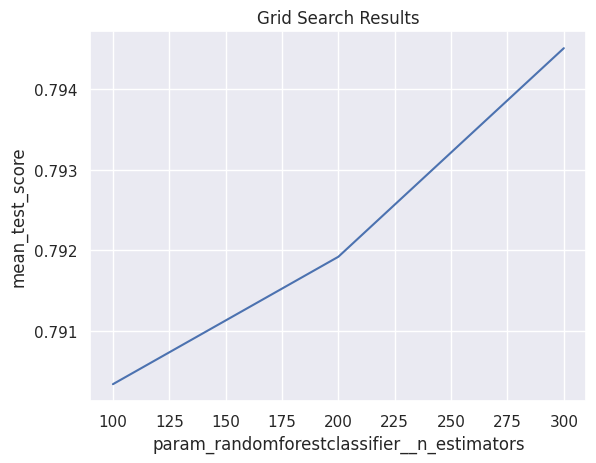

In [58]:
plot_gridsearchcv_results(grid_search=fit_models["rf"])

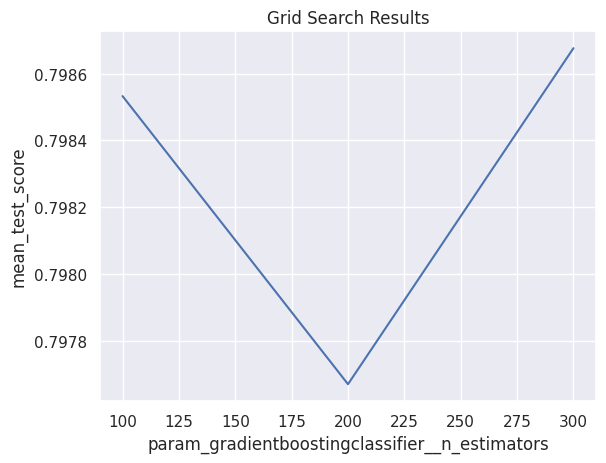

In [59]:
plot_gridsearchcv_results(grid_search=fit_models["gb"])

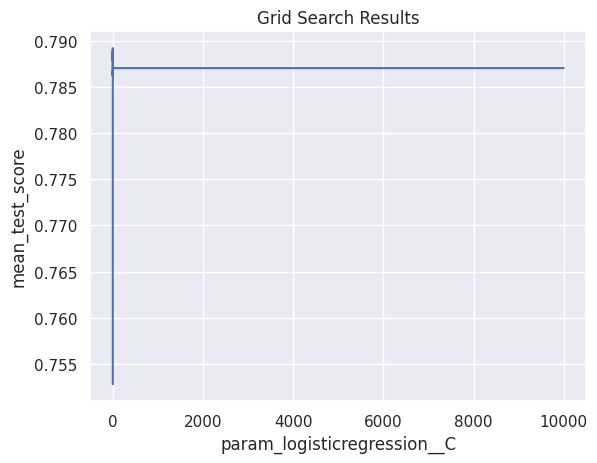

In [60]:
plot_gridsearchcv_results(grid_search=fit_models["lr"])

## Generate submission file

In [ ]:


test_df = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))

preprocessed_test_df = test_df.copy()
cleaning_and_preprocessing(df=preprocessed_test_df, age_mean=age_mean)

preprocessed_test_df = pd.get_dummies(preprocessed_test_df)
     

In [ ]:
print(test_df.shape)
print(preprocessed_test_df.shape)

(4277, 13)
(4277, 32)


In [ ]:
y_preds = fit_models['gb'].predict(preprocessed_test_df)

In [ ]:
submission_df = pd.DataFrame({"PassengerId":test_df['PassengerId'],
                              "Transported":y_preds})

In [ ]:
submission_df.head(2)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False


In [ ]:
submission_df.to_csv("submission.csv", index=None)

In [ ]:
submission_df.shape

(4277, 2)